Efficiency was 71.2809180982251 %


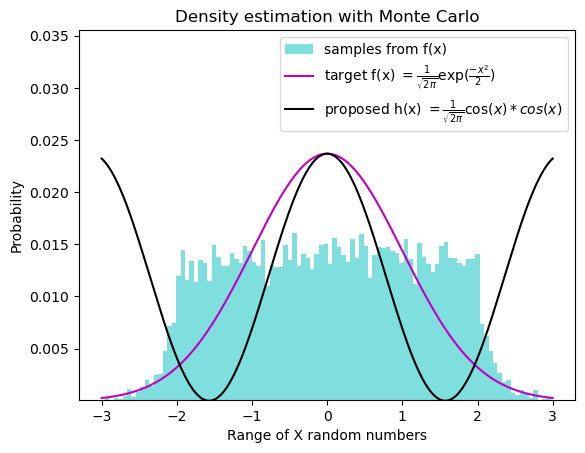

<Figure size 640x480 with 0 Axes>

In [23]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\a828a124\Downloads\PHSX815_Week5-master\PHSX815_Week5-master\python")
from Random import Random 

#global variables
bin_width = 0.
Xmin = -3.
Xmax = 3.
random = Random()

# Normal distribution with mean zero and sigma = 1
# Note: multiply by bin width to match histogram
def Gaus(x):
	return (1./np.sqrt(2.*np.arccos(-1)))*np.exp(-x*x/2.)

def PlotGaus(x,bin_width):
	return bin_width*Gaus(x)

# Uniform (flat) distribution scaled to Gaussian max
# Note: multiply by bin width to match histogram
def Prop_func1(x):
	return (1./np.sqrt(2.*np.arccos(-1)))*np.cos(x)*np.cos(x)

def PlotFlat1(x,bin_width):
	return bin_width*Prop_func1(x)
		

# Get a random X value according to a flat distribution
def SampleFlat():
	return Xmin + (Xmax-Xmin)*random.rand()

# Piecewise flat with exponential tails, scaled to Gaussian max
# Note: multiply by bin width to match histogram
def FlatPlusExpo(x):
	if x <= Xmin/4.:
		return 1./np.sqrt(2.*np.arccos(-1))*np.exp(Xmin*Xmin/8.)*np.exp(-Xmin/2.*x)
	elif x >= Xmax/4.:
		return 1./np.sqrt(2.*np.arccos(-1))*np.exp(Xmax*Xmax/8.)*np.exp(-Xmax/2.*x)
	else:
		return 1./np.sqrt(2*np.arccos(-1))

def PlotFlatPlusExpo(x, bin_width):
  return bin_width*FlatPlusExpo(x);


# Get a random X value according to flat plus exponentials distribution
def SampleFlatPlusExpo():
  R = random.rand()
  Nexp = np.sqrt(2./np.arccos(-1))/Xmax*(1 - np.exp(-3.*Xmax*Xmax/8.))
  Ntot = 2.*Nexp + Xmax/2./np.sqrt(2.*np.arccos(-1))
  if R <= Nexp/Ntot:
    F = random.rand()
    return 2./Xmax*np.log(F*np.exp(-Xmax*Xmax/2.)+(1.-F)*np.exp(-Xmax*Xmax/8))
  if R >= (1.-Nexp/Ntot):
    F = random.rand()
    return -2./Xmax*np.log(F*np.exp(-Xmax*Xmax/2.)+(1.-F)*np.exp(-Xmax*Xmax/8))
  else:
	  return Xmin/4. + (Xmax-Xmin)/4.*random.rand();




#main function
if __name__ == "__main__":


	# default number of samples
	Nsample = 10000

	doLog = False
	doExpo = False

	# read the user-provided seed from the command line (if there)
	#figure out if you have to have -- flags before - flags or not
	if '-Nsample' in sys.argv:
		p = sys.argv.index('-Nsample')
		Nsample = int(sys.argv[p+1])
	if '-range' in sys.argv:
		p = sys.argv.index('-range')
		Xmax = float(sys.argv[p+1])
		Xmin = -float(sys.argv[p+1])
	if '--log' in sys.argv:
		p = sys.argv.index('--log')
		doLog = bool(sys.argv[p])
	if '--expo' in sys.argv:
		p = sys.argv.index('--expo')
		doExpo = bool(sys.argv[p])
	if '-h' in sys.argv or '--help' in sys.argv:
		print ("Usage: %s [-Nsample] number [-range] Xmax [--log] [--expo] " % sys.argv[0])
		print
		sys.exit(1)  


	data = []
	Ntrial = 0.
	i = 0.
	while i < Nsample:
		Ntrial += 1
		if doExpo:
			X = SampleFlatPlusExpo()
			R = Gaus(X)/FlatPlusExpo(X)
		else:
			X = SampleFlat()
			R = Gaus(X)/Prop_func1(X)
		rand = random.rand()
		if(rand > R): #reject if outside
			continue
		else: #accept if inside
			data.append(X)
			i += 1 #increase i and continue
	
	if Ntrial > 0:
		print("Efficiency was", 100*float(Nsample)/float(Ntrial), "%")


	#normalize data for probability distribution
	weights = np.ones_like(data) / len(data)
	n = plt.hist(data, weights=weights, alpha=0.5, color = 'c', label="samples from f(x)", bins=100)
	plt.ylabel("Probability")
	plt.xlabel("Range of X random numbers")
	bin_width = n[1][1] - n[1][0]
	hist_max = max(n[0])

	if not doLog:
		plt.ylim(min(bin_width*Gaus(Xmax),1./float(Nsample+1)),
		1.5*max(hist_max,bin_width*Gaus(0)))
	else:
		plt.ylim(min(bin_width*Gaus(Xmax),1./float(Nsample+1)),
		80*max(hist_max,bin_width*Gaus(0)))
		plt.yscale("log")


	x = np.arange(Xmin,Xmax,0.001)
	y_norm = list(map(PlotGaus,x,np.ones_like(x)*bin_width))
	# y_norm = list(map(PlotGaus(x,bin_width))
	plt.plot(x, y_norm, color='m',label=r'target f(x) $=\frac{1}{\sqrt{2\pi}}\exp(\frac{-x^2}{2})$')

	if not doExpo:
		y_flat = list(map(PlotFlat1,x,np.ones_like(x)*bin_width))
	else:
		y_flat = list(map(PlotFlatPlusExpo,x,np.ones_like(x)*bin_width))

	plt.plot(x, y_flat, color='black',label=r'proposed h(x) $=\frac{1}{\sqrt{2\pi}}\cos(x)*cos(x)$')
	plt.title("Density estimation with Monte Carlo")

	plt.legend()
	plt.show()
	plt.savefig("Proposed_cosine_10000.pdf")

